# Model Tuning

This notebook will demonstate how to automatically tune model hyperparameters for predictions accuracy.

## Set-Up
We will begin with some imports

In [1]:
import autompc as ampc
import numpy as np

Loading AutoMPC...
Finished loading AutoMPC


And we will then generate some training data using the benchmark.

In [2]:
from autompc.benchmarks import CartpoleSwingupBenchmark

benchmark = CartpoleSwingupBenchmark()

system = benchmark.system
trajs = benchmark.gen_trajs(seed=100, n_trajs=500, traj_len=200)

## Tuning

First, we create an evaluator instance.  The evaluator determines what strategy should be used for partitioning data (i.e. holdout, cross-validation, etc.) and what scoring metric to use.  Here we use an evaluator with 10\% holdout and the RMSE metric.

In [3]:
from autompc.evaluation import HoldoutModelEvaluator

evaluator = HoldoutModelEvaluator(system, metric="rmse", holdout_prop=0.1, trajs=trajs,
                                  rng=np.random.default_rng(100), horizon=20)

We can now create our model tuner class and add the models we wish to consider.  Here, we will consider the SINDy and MLP models.

In [4]:
from autompc.tuning import ModelTuner
from autompc.sysid import SINDy, MLP

tuner = ModelTuner(system, evaluator)
tuner.add_model(SINDy(system))
tuner.add_model(MLP(system))

/usr/lib/python3/dist-packages/pyparsing.py:1745: FutureWarning: Possible set intersection at position 3
  self.re = re.compile( self.reString )


Now, we can run the tuner to automatically search the hyperparameter space!

In [5]:
tuned_model, tune_result = tuner.run(n_iters=200, rng=np.random.default_rng(100))

/home/william/.local/lib/python3.8/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 19
  _MLP:hidden_size_2, Value: 210
  _MLP:lr, Value: 0.025269038206003618
  _MLP:n_hidden_layers, Value: '2'
  _MLP:nonlintype, Value: 'relu'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:35<00:00,  1.90s/it]
Model Score  1.2063301994896862
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 5.041686275233749e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 7
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59789e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59789e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59789e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59789e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1572955462657566
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 3
  _SINDy:threshold, Value: 0.0006883461385508616
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 5
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  1.1572022931138959
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 160
  _MLP:hidden_size_2, Value: 162
  _MLP:hidden_size_3, Value: 48
  _MLP:hidden_size_4, Value: 156
  _MLP:lr, Value: 0.0008943864506701894
  _MLP:n_hidden_layers, Value: '4'
  _MLP:nonlintype, Value: 'tanh'
  model, Value: 'MLP'

100%|██████████| 50/50 [02:10<00:00,  2.61s/it]
Model Score  0.3990234550924215
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 93
  _MLP:hidden_size_2, Value: 129
  _MLP:hidden_size_3, Value: 36
  _MLP:hidden_size_4, Value: 59
  _MLP:lr, Value: 0.00016381665794120277
  _ML

/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:144: UserWarning: Sparsity parameter is too big (1.6863303579875033) and eliminated all coefficients
  warnings.warn(


Model Score  7.108676901781421
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 0.019731346229992234
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.57407e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.57407e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.57407e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.57407e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  4.889697664487217
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 207
  _MLP:hidden_size_2, Value: 58
  _MLP:lr, Value: 0.5814824601404641
  _MLP:n_hidden_layers, Value: '2'
  _MLP:nonlintype, Value: 'relu'
  model, Value: 'MLP'

100%|██████████| 50/50 [02:03<00:00,  2.46s/it]
Model Score  7.346703150703002
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 123
  _MLP:lr, Value: 0.00023582067023829108
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'sigmoid'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:01<00:00,  1.22s/it]
Model Score  1.6013638140629454
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 4
  _SINDy:threshold, Value: 0.5813139355094862
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 4
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (0.5813139355094862) and eliminated all coefficients
  warnings.warn(
/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (0.5813139355094862) and eliminated all coefficients
  warnings.warn(


Model Score  3.6097682256399297
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 0.03824941462698902
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 2
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.379988697023619
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 237
  _MLP:hidden_size_2, Value: 121
  _MLP:hidden_size_3, Value: 62
  _MLP:lr, Value: 0.005330090446026225
  _MLP:n_hidden_layers, Value: '3'
  _MLP:nonlintype, Value: 'selu'
  model, Value: 'MLP'

100%|██████████| 50/50 [02:01<00:00,  2.43s/it]
Model Score  0.792552560818355
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 49
  _MLP:hidden_size_2, Value: 148
  _MLP:hidden_size_3, Value: 22
  _MLP:lr, Value: 0.1537124083696208
  _MLP:n_hidden_layers, Value: '3'
  _MLP:nonlintype, Value: 'selu'
  model, Value: 'MLP'

100%|██████████| 50/50 [02:06<00:00,  2.52s/it]
Model Score  9.452647466181107
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 1.688962262602859e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7203e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7203e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7203e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7203e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/proj/autompc_multitask/autompc/sysid/basis_funcs.py:31: RuntimeWarning: overflow encountered in power
  return x**self.degree
/hom

Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 2
  _SINDy:threshold, Value: 0.0012967341970537
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'

Model Score  3.6078266939785473
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 190
  _MLP:lr, Value: 3.44521528502681e-05
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'sigmoid'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:02<00:00,  1.25s/it]
Model Score  3.547023977880503
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 79
  _MLP:hidden_size_2, Value: 213
  _MLP:hidden_size_3, Value: 43
  _MLP:lr, Value: 0.29060380807786906
  _MLP:n_hidden_layers, Value: '3'
  _MLP:nonlintype, Value: 'tanh'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:55<00:00,  2.30s/it]
Model Score  8.377918315520297
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SI

/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:144: UserWarning: Sparsity parameter is too big (2.7917167555117466) and eliminated all coefficients
  warnings.warn(


Model Score  21.629763193430794
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 0.2518753295743032
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 7
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  6.4998295736707155
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 220
  _MLP:lr, Value: 6.419466206597381e-05
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'relu'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:01<00:00,  1.23s/it]
Model Score  1.584549393434448
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 32
  _MLP:lr, Value: 0.001895928903572734
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'relu'
  model, Value: 'MLP'

100%|██████████| 50/50 [00:57<00:00,  1.15s/it]
Model Score  0.8253129008774311
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false

/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:144: UserWarning: Sparsity parameter is too big (8.09818216439906) and eliminated all coefficients
  warnings.warn(


Model Score  21.629763193430794
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 0.1299277208830167
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'

Model Score  5.575918278379898
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 250
  _MLP:hidden_size_2, Value: 201
  _MLP:hidden_size_3, Value: 68
  _MLP:hidden_size_4, Value: 179
  _MLP:lr, Value: 0.0003853707336788755
  _MLP:n_hidden_layers, Value: '4'
  _MLP:nonlintype, Value: 'selu'
  model, Value: 'MLP'

100%|██████████| 50/50 [02:27<00:00,  2.96s/it]
Model Score  0.2802050843793813
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 117
  _MLP:hidden_size_2, Value: 177
  _MLP:hidden_size_3, Value: 163
  _MLP:lr, Value: 5.7767451810691336e-05
  _MLP:n_hidden_layers, Value: '3'
  _MLP:nonlintype, Value: 'relu'
  model, Value: 'MLP'

100%|██████████| 50/50 [02:05<00:00,  2.52s/it]


/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (0.817835733923675) and eliminated all coefficients
  warnings.warn(


Model Score  3.6097682256399297
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 243
  _MLP:lr, Value: 0.3912967938725045
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'tanh'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:03<00:00,  1.27s/it]
Model Score  36.9289859633733
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 70
  _MLP:lr, Value: 0.03734002537178787
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'tanh'
  model, Value: 'MLP'

100%|██████████| 50/50 [00:59<00:00,  1.18s/it]
Model Score  1.2479200132347783
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 0.0003330989718992843
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'

Model Score  3.6078266939785473
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 2

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.4146098700551164
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 4.8829677609366915e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.1859e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.1859e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.1859e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.1859e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/proj/autompc_multitask/autompc/sysid/basis_funcs.py:31: RuntimeWarning: overflow encountered in power
  return x**self.degree
/hom

Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 4
  _SINDy:threshold, Value: 0.05803823035937069
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'

Model Score  5.575918278379898
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 4
  _SINDy:threshold, Value: 0.0009513997152916112
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  1.1554732351443584
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 16
  _MLP:hidden_size_2, Value: 136
  _MLP:hidden_size_3, Value: 226
  _MLP:hidden_size_4, Value: 131
  _MLP:lr, Value: 2.0305987526441588e-05
  _MLP:n_hidden_layers, Value: '4'
  _MLP:nonlintype, Value: 'sigmoid'
  model, Value: 'MLP'

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59297e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59297e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59297e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59297e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1543329758272642
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 0.0018368986571666366
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 5
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.15406211745012
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 0.8856486645174662
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (0.8856486645174662) and eliminated all coefficients
  warnings.warn(
/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (0.8856486645174662) and eliminated all coefficients
  warnings.warn(


Model Score  5.599710176780017
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 0.0010779161261560187
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 5
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1563066373659487
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 0.002220547738461937
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'

Model Score  4.888477531772173
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 154
  _MLP:hidden_size_2, Value: 164
  _MLP:hidden_size_3, Value: 26
  _MLP:lr, Value: 8.89963708573999e-05
  _MLP:n_hidden_layers, Value: '3'
  _MLP:nonlintype, Value: 'selu'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:56<00:00,  2.32s/it]
Model Score  0.21249005002066534
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 70
  _MLP:lr, Value: 0.0013965558757344416
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'selu'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:00<00:00,  1.21s/it]
Model Score  0.9325302198842194
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61448e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.157344926522041
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 0.0008706393858281693
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59297e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59297e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59297e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59297e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1556995714927147
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 6.295078425557903
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 4
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (6.295078425557903) and eliminated all coefficients
  warnings.warn(
/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (6.295078425557903) and eliminated all coefficients
  warnings.warn(


Model Score  9.218089608750796
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 4.9052775037277334e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77519e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77519e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77519e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77519e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1568047068033744
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 0.001787349432954498
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 5
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.90965e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.90965e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.90965e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.90965e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.15406211745012
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 0.00015466390897035326
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 4
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1560836394986376
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 8.730614084830292e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 4
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1560551054443047
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 232
  _MLP:hidden_size_2, Value: 43
  _MLP:hidden_size_3, Value: 45
  _MLP:hidden_size_4, Value: 44
  _MLP:lr, Value: 0.01044900532721644
  _MLP:n_hidden_layers, Value: '4'
  _MLP:nonlintype, Value: 'selu'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:57<00:00,  2.34s/it]
Model Score  1.361493461203578
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 0.0015826764292982604
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 6
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.14161e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.14161e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.14161e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.14161e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.6139239556588585
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 22
  _MLP:hidden_size_2, Value: 112
  _MLP:hidden_size_3, Value: 109
  _MLP:hidden_size_4, Value: 99
  _MLP:lr, Value: 0.0008955755149973795
  _MLP:n_hidden_layers, Value: '4'
  _MLP:nonlintype, Value: 'relu'
  model, Value: 'MLP'

100%|██████████| 50/50 [02:11<00:00,  2.63s/it]
Model Score  0.19817897941021217
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 3
  _SINDy:threshold, Value: 0.0019413291605455544
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  1.1537758151213873
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 9.871802211744927e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1550178899894428
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 0.006184957465958657
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 2
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.57169e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.57169e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.57169e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.57169e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.461977761495505
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 0.0020323468901024913
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1537758151213873
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 6.245701167720186e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 2
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.64774e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.64774e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.64774e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.64774e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1562193835100538
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 0.019862472991556968
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 3
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  1.1543329758272642
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 4.44994308153849e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1555696450121462
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 4.7593926891420174e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1555696450121462
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 0.00021113561077143648
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 2
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4242961419686035
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 8.733437375179302e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 5
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43559e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43559e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43559e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43559e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.6347265987482102
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 1.8925038994291404e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1550178899894428
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.002118265399899444
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1537758151213873
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 4.8829677609366915e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1555696450121462
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.0021445177150774953
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1537758151213873
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 3.7020510727055924e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1560357229897311
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 1.7936471383229876e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1565811734291165
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 3.501630287337561e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1560357229897311
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 1.7631003145617685e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1550178899894428
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 1.6463940251763057e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1565811734291165
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 7.25155083857997e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 3
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.426827171141173
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 8.380173455300942e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 5
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4283332093988994
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 1.774055292448134e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, V

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1550178899894428
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 6.671496725105037e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.429059957073735
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 6.535803287055474e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 123
  _MLP:lr, Value: 1.2443985486630283e-05
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'selu'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:01<00:00,  1.24s/it]
Mod

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.623869435959381
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 1.7667063609025245e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77591e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1565811734291165
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 5.9782669917272275e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10548e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.6244517091112805
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 1.7037891916028298e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1550178899894428
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.5279864641089545e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 4
  _SINDy:threshold, Value: 5.5755668097969035e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.6359339545700853
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 1.0178927907337985e-05
  _SINDy:time_mode, Value

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.157356112689144
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 4
  _SINDy:threshold, Value: 2.6851777871465924e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'

Model Score  3.483244133383338
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.243036271847753e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 94
  _MLP:hidden_size_2, Value: 131
  _MLP:lr, Value: 0.012154371200903182
  _MLP:n_hidden_layers, Value: '2'
  _MLP:nonlintype, Value: 'relu'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:50<00:00,  2.20s/it]
Model Score  0.

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1555696450121462
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 1.665667411898097e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 2
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84717e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84717e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84717e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84717e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1575968093302964
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.099188060080025e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.083330107302412e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 2.4117761863518605e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44703e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44703e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44703e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44703e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/proj/autompc_multitask/autompc/sysid/basis_funcs.py:31: RuntimeWarning: overflow encountered in square
  return x**self.degree

Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.056508267836891e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.018495737658342e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 2.0150856213769483e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_fr

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1546828130346467
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 4.9860377748144105e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 5.065379354783563e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 4
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64999e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64999e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64999e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64999e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/proj/autompc_multitask/autompc/sysid/basis_funcs.py:31: RuntimeWarning: overflow encountered in square
  return x**self.degree

Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 0.09058124989237276
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52353e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52353e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52353e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52353e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.1520813277559987
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.0031233499505997965
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1537758151213873
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 2.0183184197960954e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 5
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4283342266210908
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.083330107302412e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 7
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.42902405527859
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.072640786953639e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_

/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (2.798372996412012) and eliminated all coefficients
  warnings.warn(
/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (2.798372996412012) and eliminated all coefficients
  warnings.warn(


Model Score  9.218089608750796
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 2.037378537970191e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1565811734291165
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 0.12139559765629492
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 7
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  6.4998295736707155
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 2.1080434682971117e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1546828130346467
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.0028100968834451428
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1537758151213873
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 77
  _MLP:lr, Value: 0.016477023520139106
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'sigmoid'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:00<00:00,  1.21s/it]
Model Score  0.3847361624955872
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 2.5593252934133935e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1549453404117866
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 2.3722635793620728e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1546828130346467
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.056804799721547304
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.3803502364617777
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.09221010462841725
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 2
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70423e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70423e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70423e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70423e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.254610022794134
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 2.3736585265654436e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 4
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1565734512159422
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 4.9709414704278684e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.0371792397879696e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 4.967596990816944e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:tr

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/proj/autompc_multitask/autompc/sysid/basis_funcs.py:31: RuntimeWarning: overflow encountered in power
  return x**self.degree


Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 6.0656271101028226e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82341e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82341e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82341e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82341e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1564556881096408
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 0.01301096699265837
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.57255e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.57255e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.57255e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.57255e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  4.838054013097385
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.0019432888809688127
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1537758151213873
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 2.7718928863490303e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 4
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95782e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1571682632105706
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 8.979930773796353e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.429062136476631
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.003258049771196054
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77519e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77519e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77519e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77519e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1537758151213873
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 5.90526785002269e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82341e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82341e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82341e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82341e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1564556881096408
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 1.0877269027364836e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1565811734291165
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 201
  _MLP:hidden_size_2, Value: 110
  _MLP:lr, Value: 0.000520398197721475
  _MLP:n_hidden_layers, Value: '2'
  _MLP:nonlintype, Value: 'tanh'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:39<00:00,  1.99s/it]
Model Score  0.19425468255200098
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 7.939576675950978
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (7.939576675950978) and eliminated all coefficients
  warnings.warn(
/home/william/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:154: UserWarning: Sparsity parameter is too big (7.939576675950978) and eliminated all coefficients
  warnings.warn(


Model Score  9.218089608750796
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 0.08662620272713091
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52353e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52353e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52353e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52353e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.2695887613531553
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.00043501149039768683
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1550734904028692
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 2
  _SINDy:threshold, Value: 5.422971761175875e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  1.1555696450121462
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.057822449119043315
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.38061399099237
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 2
  _SINDy:threshold, Value: 2.0630072125895402e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 4
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  1.1571564040700306
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 0.0036944843827260107
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'

Model Score  4.890163313418823
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 4.9301287947025207e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, 

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1546828130346467
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 28
  _MLP:hidden_size_2, Value: 216
  _MLP:lr, Value: 0.0013011396982578344
  _MLP:n_hidden_layers, Value: '2'
  _MLP:nonlintype, Value: 'sigmoid'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:30<00:00,  1.81s/it]
Model Score  1.2980714531563042
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.03953387537248348
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.381136537887762
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 2.418596701970408e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1546828130346467
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.0685296297690634e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.03595039377446904
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44703e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44703e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44703e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44703e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  3.850392680852279
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.846087509024981e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  1.1564218424091022
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 2.3973340141017707e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1546828130346467
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.058265656733496e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.066840902258219e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.7134514663518e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_fre

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/proj/autompc_multitask/autompc/sysid/basis_funcs.py:31: RuntimeWarning: overflow encountered in power
  return x**self.degree


Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 2.4087662263549327e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04068e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1546828130346467
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.002967009578984974
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 7
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83047e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83047e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83047e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83047e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1543329758272642
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.0018741921314422711
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1530164211229053
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.001962715802737808
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61705e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.6006063742418957
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.010154913520658e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 7
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4290247022478213
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 0.01839266725203118
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 2
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.4264774230476447
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 5.860464858734038e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  1.1564218424091022
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.0002291052077776995
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1558065341876596
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 2.4186672290558556e-05
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44291e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1546828130346467
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.0015421369851455465
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1544133383642319
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.0017803941519401803
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1530164211229053
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 27
  _MLP:hidden_size_2, Value: 16
  _MLP:lr, Value: 1.1901653760327378e-05
  _MLP:n_hidden_layers, Value: '2'
  _MLP:nonlintype, Value: 'tanh'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:06<00:00,  1.34s/it]
Model Score  3.5823532675045273
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 6
  _SINDy:threshold, Value: 0.006761350565623992
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 2
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41834e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.45871378810823
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.09067119045526051
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 7
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43104e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43104e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43104e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43104e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.1520813277559987
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 2.5858486712541152e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.0009113710091944739
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82901e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1557199789598172
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 4.845164764113165e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'

Model Score  2.4174290395377582
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 5
  _SINDy:threshold, Value: 0.00022244114450968794
  _SINDy:time_mode, Value: 'discrete'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 1
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09313e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  1.1549344891466449
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 7
  _SINDy:threshold, Value: 0.08688838333302729
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 4
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.54943e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.54943e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.54943e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.54943e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.2695887613531553
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.10983287467422934
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.1103954705199737
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.11566231907426408
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.1103954705199737
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'true'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:poly_degree, Value: 8
  _SINDy:threshold, Value: 0.12491268579332127
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 8
  _SINDy:trig_interaction, Value: 'false'
  model, Value: 'SINDy'



/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.1078548651805726
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 219
  _MLP:hidden_size_2, Value: 164
  _MLP:hidden_size_3, Value: 245
  _MLP:hidden_size_4, Value: 127
  _MLP:lr, Value: 0.0007631901741235632
  _MLP:n_hidden_layers, Value: '4'
  _MLP:nonlintype, Value: 'sigmoid'
  model, Value: 'MLP'

100%|██████████| 50/50 [02:44<00:00,  3.29s/it]
Model Score  0.1557795942544057
Evaluating Cfg:
Configuration:
  _MLP:hidden_size_1, Value: 183
  _MLP:hidden_size_2, Value: 227
  _MLP:lr, Value: 0.027409808132193455
  _MLP:n_hidden_layers, Value: '2'
  _MLP:nonlintype, Value: 'tanh'
  model, Value: 'MLP'

100%|██████████| 50/50 [01:49<00:00,  2.18s/it]
Model Score  3.619667117207567
Evaluating Cfg:
Configuration:
  _SINDy:poly_basis, Value: 'false'
  _SINDy:poly_cross_terms, Value: 'false'
  _SINDy:threshold, Value: 3.514249231780925e-05
  _SINDy:time_mode, Value: 'continuous'
  _SINDy:trig_basis, Value: 'true'
  _SINDy:trig_freq, Value: 4
  _SINDy:trig_interacti

/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/william/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42976e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Score  2.599204868142806
100%|██████████| 50/50 [02:08<00:00,  2.56s/it]


## Visualizing the Results

We can now visualize the tuning results.  First, we will plot the tuning curve.  This shows the holdout set performance of the best-known model at different points over the course of the tuning process.

<IPython.core.display.Javascript object>


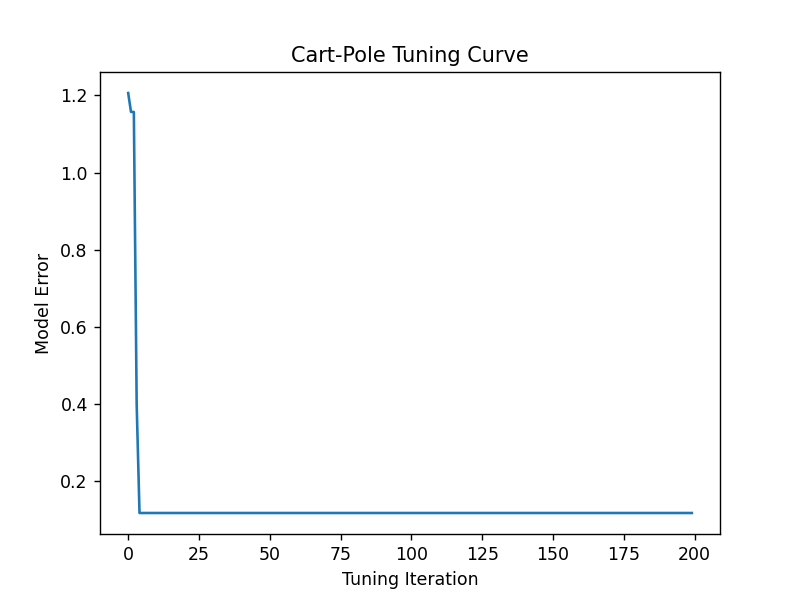

In [6]:
%matplotlib notebook

from autompc.graphs import TuningCurveGraph
import matplotlib.pyplot as plt

graph = TuningCurveGraph()

fig = plt.figure()      
ax = fig.gca()
graph(ax, tune_result)
ax.set_title("Cart-Pole Tuning Curve")
plt.show()

Let's check what configuration was selected by the tuner.

In [7]:
tune_result.inc_cfg

Configuration:
  _MLP:hidden_size_1, Value: 93
  _MLP:hidden_size_2, Value: 129
  _MLP:hidden_size_3, Value: 36
  _MLP:hidden_size_4, Value: 59
  _MLP:lr, Value: 0.00016381665794120277
  _MLP:n_hidden_layers, Value: '4'
  _MLP:nonlintype, Value: 'tanh'
  model, Value: 'MLP'

We see that the tuner selected a 2-layer MLP with `tanh` activations.

Next, we can compare the performance of our tuned model to the default MLP configuration.  We will generate a fresh dataset for testing and compare over multiple prediction horizons.  For more details on how to do this comparison, see [2. Models].

100%|██████████| 50/50 [01:51<00:00,  2.23s/it]


<IPython.core.display.Javascript object>


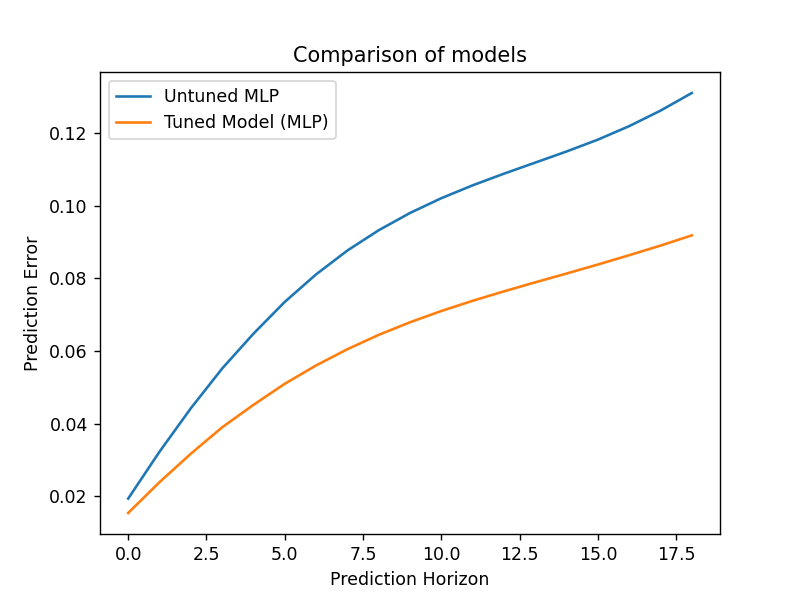

In [8]:
untuned_model = MLP(system)
untuned_model.train(trajs)

testing_set = benchmark.gen_trajs(seed=101, n_trajs=100, traj_len=200)

from autompc.graphs.kstep_graph import KstepPredAccGraph

graph = KstepPredAccGraph(system, trajs, kmax=20, metric="rmse")
graph.add_model(untuned_model, "Untuned MLP")
graph.add_model(tuned_model, "Tuned Model (MLP)")

fig = plt.figure()
ax = fig.gca()
graph(fig, ax)
ax.set_title("Comparison of models")
plt.show()

As we can see, the tuned model outperforms the untuned model on the unseen dataset at all prediction horizons.